<a href="https://colab.research.google.com/github/GiangAnhTuan-20146450/Bai-Tap-AI/blob/main/Excercise_W9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
(x_train,y_train),(x_test, y_test)= cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape 

(50000, 1)

In [ ]:

x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape 

(10000, 1)

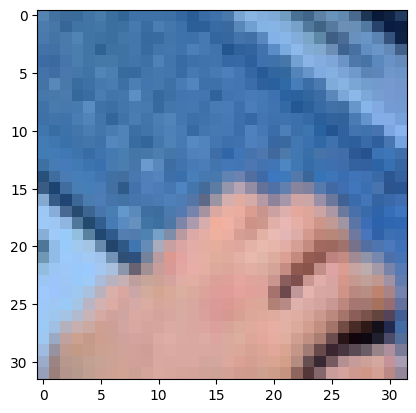

So: [39]


In [ ]:
import matplotlib.pyplot as plt
cifar100 = x_train[10]
plt.imshow(cifar100,cmap=plt.cm.binary)
plt.show()
print ('So:',y_train[10])

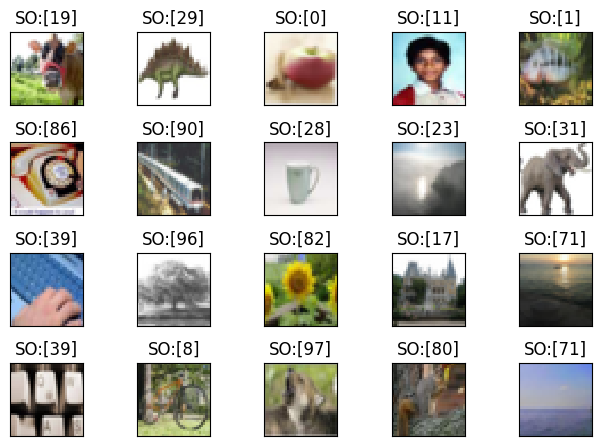

In [ ]:
for i in range (20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('SO:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
model = Sequential()
model.add(Dense(5000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_2 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_3 (Dense)             (None, 100)               100100    
                                                                 
Total params: 33,469,100
Trainable params: 33,469,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = x_test
y = y_test

In [ ]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical
y_train  = to_categorical(y_train,100)
y_test = to_categorical (y_test,100)

In [ ]:
y_test.shape

(10000, 100)

In [ ]:
y_train.shape

(50000, 100)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10,batch_size=128)
test_loss, test_acc = model.evaluate(x_test ,y_test)
print('Mat mat :',test_loss)
print('Do chinh xac :',test_acc)

Epoch 1/10
391/391 [==============================] - 407s 1s/step - loss: 4.4601 - accuracy: 0.0506
Epoch 2/10
391/391 [==============================] - 425s 1s/step - loss: 3.8565 - accuracy: 0.1076
Epoch 3/10
391/391 [==============================] - 438s 1s/step - loss: 3.6445 - accuracy: 0.1422
Epoch 4/10
391/391 [==============================] - 438s 1s/step - loss: 3.5010 - accuracy: 0.1668
Epoch 5/10
391/391 [==============================] - 434s 1s/step - loss: 3.3867 - accuracy: 0.1867
Epoch 6/10
391/391 [==============================] - 433s 1s/step - loss: 3.2770 - accuracy: 0.2051
Epoch 7/10
391/391 [==============================] - 430s 1s/step - loss: 3.1859 - accuracy: 0.2216
Epoch 8/10
391/391 [==============================] - 431s 1s/step - loss: 3.0850 - accuracy: 0.2416
Epoch 9/10
391/391 [==============================] - 430s 1s/step - loss: 2.9931 - accuracy: 0.2593
Epoch 10/10
313/313 [==============================] - 26s 83ms/step - loss: 3.3763 - accur

In [ ]:
model.save('test2.h5')

1/1 [==============================] - 0s 366ms/step


array([52])

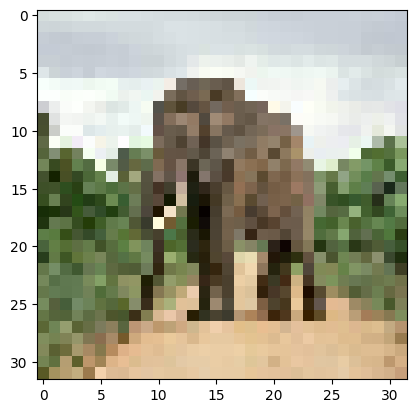

In [ ]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
img = load_img ('voi.jfif',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape (1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)